In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
from config import config
from utils import visualize_X_samples_grid

import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as T
import torchvision.transforms.functional as TF
import lightning as L
import lightning.pytorch as pl
import matplotlib.pyplot as plt
torch.set_float32_matmul_precision('medium')

log_level: TRACE
dirs:
  project_root: /home/stud/ath/ath_ws/others/pixel_art_generator
  data: ${dirs.project_root}/data
  output: ${dirs.project_root}/output
  output_test_images: ${dirs.output}/test_images
  output_val_images: ${dirs.output}/val_images
image_size: 16
train:
  batch_size: 4
  fast_dev_run: true
  overfit_batches: 1
  seed: 42
  save_image_epochs: 2
  patience: 4
  max_epochs: 2
  check_val_every_n_epoch: 2
  num_sanity_val_steps: 1
  log_every_n_steps: 25
  accumulate_grad_batches: 2
  learning_rate: 0.0001
  lr_warmup_steps: 500
test:
  batch_size: 2



# Check Data Module

In [3]:
from dataset import SpriteDataModule
dm = SpriteDataModule()
dm.setup(stage='fit')

INFO     | setup | Train Dataset       : 71520 samples
INFO     | setup | Validation Dataset  : 17880 samples


In [4]:
dl = dm.train_dataloader()
batch = next(iter(dl))

In [5]:
images, labels = batch
images.shape, labels.shape

(torch.Size([64, 3, 16, 16]), torch.Size([64]))

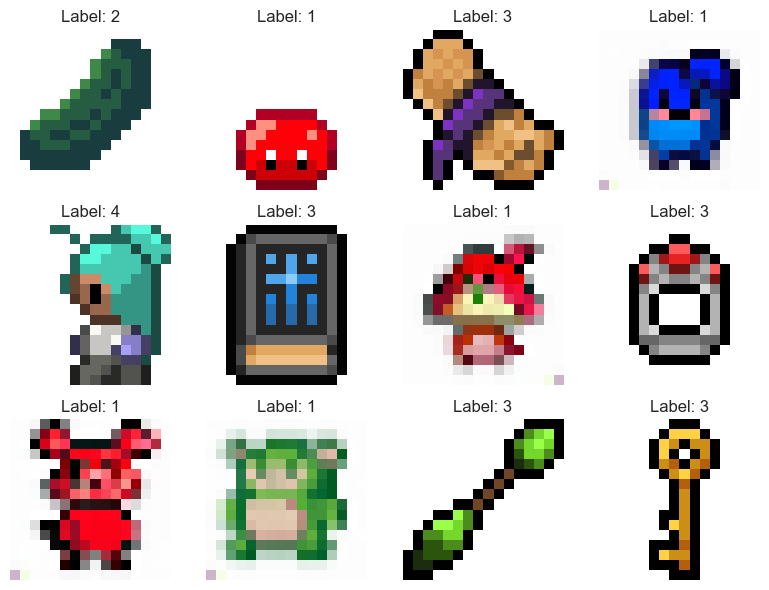

In [23]:
visualize_X_samples_grid(images, labels)

In [21]:
images = np.load('./output/test_images/samples.npy')
labels = np.load('./output/test_images/labels.npy')

images.shape, labels.shape

((2, 3, 32, 32), (2,))

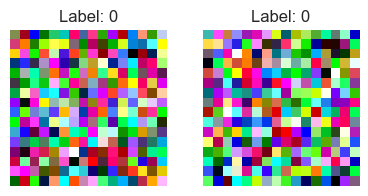

In [22]:
visualize_X_samples_grid(images, labels, n_samples=2, n_cols=2)